In [71]:
#Data loading and data preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

import pandas as pd
#Note spam =1 ham =0 
data1 = pd.read_excel('spamham/SPAM text message 20170820 - Data1.xlsx')

x=[]
y=[]
for key,row1 in data1.iterrows():

    val=0
    #string=str(row1['Message'])
    string=re.sub(r'[^a-z A-Z 0-9]', '', str(row1['Message']))
    #print(string)
    string=string.lower()
    x.append(string)
    if(row1['Category']=='spam'):
        val=1
    y.append(val)
    
data2 = pd.read_csv('spamham/lingSpam.csv')

for key,row2 in data2.iterrows():
    string=str(row2['Body'])
    string=re.sub(r'[^a-z A-Z 0-9]', '', string)
    string=string.lower()
    x.append(string)
    y.append(row2['Label'])
    
    
data3 = pd.read_csv('spamham/completeSpamAssassin.csv')

for key,row3 in data3.iterrows():
    string=str(row3['Body'])
    string=re.sub(r'[^a-z A-Z 0-9]', '', string)
    string=string.lower()
    x.append(string)
    y.append(row3['Label'])
    
data4 = pd.read_csv('spamham/enronSpamSubset.csv')

for key,row4 in data4.iterrows():
    string=str(row4['Body'])
    string=re.sub(r'[^a-z A-Z 0-9]', '', string)
    string=string.lower()
    x.append(string)
    y.append(row4['Label'])

In [72]:
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
#remove stop words
s_w = set(stopwords.words('english'))
i=0
for strobj in x:
    #taken from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
    w_t=word_tokenize(strobj)
    fs = [w for w in w_t if not w in s_w]
    strobj1=" ".join(fs)
    #ends here
    x[i]=strobj1
    i=i+1
    
print(len(x))
print(len(y))

24223
24223


In [73]:
# train test dev ratio 60 20 20
full_len=len(x)
len_train=int(len(x)*0.6)
len_dev=int(len(x)*0.2)

train_x=x[0:len_train]
dev_x=x[len_train:len_train+len_dev]
test_x=x[len_train+len_dev:full_len]

train_y=y[0:len_train]
dev_y=y[len_train:len_train+len_dev]
test_y=y[len_train+len_dev:full_len]


In [74]:
#variables initialization and size check
print(len(train_x))
print(len(test_x))

#all words in spam without repeatation
spam_wd_set={}
ham_wd_set={}
spam_count=0
ham_count=0

14533
4846


In [75]:
#Build NB classifier model
def build_model(data_x,data_y):
    global spam_wd_set,ham_wd_set,spam_count,ham_count
    i=0
    for strobj in data_x:
        w_t=word_tokenize(strobj)
        w_t_set=set(w_t)
        for w in w_t:
            if data_y[i]==1:
                if w not in spam_wd_set:
                    spam_wd_set[w]=1
                else:
                    count=spam_wd_set[w]
                    spam_wd_set[w]=count+1
            else:
                if w not in ham_wd_set:
                    ham_wd_set[w]=1
                else:
                    count=ham_wd_set[w]
                    ham_wd_set[w]=count+1                           
        i+=1 

In [76]:
#Spam and ham count
for d in train_y:
    if(d==1):
        spam_count+=1
    else:
        ham_count+=1
        

In [77]:
#for demo purpose
train_x1=['started searching get job dayshe great potential talent',
     'reckon need town eightish walk carpark']
train_y1=[1,0]
build_model(train_x,train_y)
#class probability
spam_class_prob=spam_count/len(train_x)
ham_class_prob=ham_count/len(train_x)

In [197]:
ham_class_prob

0.7670130048854331

In [78]:
#test NB classiifier 
def test_model(data_x,data_y,alpha):
    
    i=0
    correct_count=0
    accuracy=0
    for data in data_x:
        w_t=word_tokenize(data)
        spam_prob=1
        ham_prob=1
        final_lable=-20#random value initialized
        for w in w_t:
            if(w not in spam_wd_set):
                spam_prob=spam_prob*(alpha/(spam_count+2*alpha))
                #print("spam ",spam_prob)
            else:
                spam_prob=spam_prob*((spam_wd_set[w]+alpha)/(spam_count+2*alpha))
            if(w not in ham_wd_set):
                ham_prob=ham_prob*(alpha/(ham_count+2*alpha))
                #print("ham ",ham_prob)
            else:
                ham_prob=ham_prob*((ham_wd_set[w]+alpha)/(ham_count+2*alpha))
       
        
        spam_prob=spam_prob*spam_class_prob
        ham_prob=ham_prob*ham_class_prob
        if(spam_prob>=ham_prob):
            final_lable=1
        else:
            final_lable=0
        if(data_y[i]==final_lable):
            correct_count=correct_count+1
        i=i+1

    accuracy=(correct_count/len(data_x))*100
    return accuracy


In [79]:
acc_NB=test_model(dev_x,dev_y,0)
print("Accuracy using dev dataset and aplha 0 ",acc_NB)


Accuracy using dev dataset and aplha 0  92.36168455821635


In [80]:
#overfiting model so giving alpha value to 1
acc_NB=test_model(dev_x,dev_y,1)
print("Accuracy using dev dataset and aplha 1 ",acc_NB)

Accuracy using dev dataset and aplha 1  70.64409578860446


In [81]:

#Jaccord  = number of 11 matches / number of non-zero attributes
words_doc1 = {'data', 'is', 'the', 'new', 'oil', 'of', 'digital', 'economy'}
words_doc2 = {'data', 'is', 'a', 'new', 'oil'}
intersec = words_doc1.intersection(words_doc2)
union = words_doc1.union(words_doc2)
print(len(intersec)/len(union))

0.4444444444444444


In [82]:
#doing this for knn and kmeans algorithm
test_dis_x=dev_x[0:50]
train_dis_x=train_x[0:1000]
test_dis_y=dev_y[0:50]
train_dis_y=train_y[0:1000]

In [83]:
#k-nn, k=3
def knn_model(train_data_x,train_data_y,test_data_x,test_data_y):
    correct=0
    accuracy=0
    import operator
    for strobj in test_data_x:
        test_word_ls=set(word_tokenize(strobj))
        dist_obj={}
        final_label=-20
        for tr in train_data_x:
            train_word_ls=set(word_tokenize(tr))
            intersec = test_word_ls.intersection(train_word_ls)
            union = test_word_ls.union(train_word_ls)
            if(intersec!=0):
                dist=len(intersec)/len(union)
            tr_x=train_data_x.index(tr)
            dist_obj[tr_x]=1-dist
        dict_obj=dict(sorted(dist_obj.items(), key=operator.itemgetter(1))[:3])
        c_spam=0
        c_ham=0
        for key in dict_obj:
            if(train_data_y[key]==1):
                c_spam+=1
            else:
                c_ham+=1
        if(c_spam>c_ham):
            final_label=1
        else:
            final_label=0
        index_x=test_data_x.index(strobj)
        if(final_label==test_data_y[index_x]):
            correct+=1

    accuracy=(correct/len(test_data_x))*100
    return accuracy   

In [84]:
acc_knn=knn_model(train_dis_x,train_dis_y,test_dis_x,test_dis_y)
print(acc_knn)

26.0


In [85]:
#k-means algorithm starts here 
new_arr=[]
i=-1
for data in x:
    i=i+1
    dist=len(data)/(len(ham_wd_set)+len(spam_wd_set))
    obj={'x':data,'y':y[i],'dist':dist,'group':-1}
    new_arr.append(obj)

In [86]:
#k-means , here k=2 becaues wants to divide into 2 groups spam and ham
centers=[]
centers.append(new_arr[0])
centers.append(new_arr[2])
c1_wd_set=set(word_tokenize(centers[0]['x']))
c2_wd_set=set(word_tokenize(centers[1]['x']))
print(centers)

[{'x': 'go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'y': 0, 'dist': 0.0004298640161880498, 'group': -1}, {'x': 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s', 'y': 1, 'dist': 0.0007077029534803259, 'group': -1}]


In [87]:
index=-1
for data in new_arr:
        index+=1
        small=100#randomly 100

        x_wd_set=set(word_tokenize(data['x']))
   
        intersec1 = x_wd_set.intersection(c1_wd_set)
        union1 = x_wd_set.union(c1_wd_set)
        
        intersec2 = x_wd_set.intersection(c2_wd_set)
        union2 = x_wd_set.union(c2_wd_set)
        
        dist1=len(intersec1)/len(union1)
        dist2=len(intersec2)/len(union2)
        
        if(dist1>dist2):
            new_arr[index]['group']=centers[0]['y']
        else:
            new_arr[index]['group']=centers[1]['y']
            

In [88]:
import math
#center value cal
a=pd.DataFrame(new_arr)
groupby = a.groupby('group', axis=0)
mean_dis=[]
for index,itr in groupby.mean().iterrows():
    
    if(math.isclose(itr['dist'], centers[0]['dist'], rel_tol=1e-5)):
        print("same")
    elif(math.isclose(itr['dist'], centers[1]['dist'], rel_tol=1e-5)):
        print("same")
    else:
        mean_dis.append(itr['dist'])
print(mean_dis)
for data in new_arr:
    if(math.isclose(data['dist'], mean_dis[0], rel_tol=1e-5)):
        centers[0]=data
    if(math.isclose(data['dist'], mean_dis[1], rel_tol=1e-5)):
        centers[1]=data
centers
c1_wd_set=set(word_tokenize(centers[0]['x']))
c2_wd_set=set(word_tokenize(centers[1]['x']))

[0.008717474600764762, 0.0071716864685213155]


In [89]:
index=-1
for data in new_arr:
        index+=1
        small=100#randomly 100

        x_wd_set=set(word_tokenize(data['x']))
   
        intersec1 = x_wd_set.intersection(c1_wd_set)
        union1 = x_wd_set.union(c1_wd_set)
        
        intersec2 = x_wd_set.intersection(c2_wd_set)
        union2 = x_wd_set.union(c2_wd_set)
        
        dist1=len(intersec1)/len(union1)
        dist2=len(intersec2)/len(union2)
        
        if(dist1>dist2):
            new_arr[index]['group']=centers[0]['y']
        else:
            new_arr[index]['group']=centers[1]['y']

In [90]:
import math
#center value cal
a=pd.DataFrame(new_arr)
groupby = a.groupby('group', axis=0)
mean_dis=[]
for index,itr in groupby.mean().iterrows():
    
    if(math.isclose(itr['dist'], centers[0]['dist'], rel_tol=1e-5)):
        print("")
    elif(math.isclose(itr['dist'], centers[1]['dist'], rel_tol=1e-5)):
        print("")
    else:
        mean_dis.append(itr['dist'])
print(mean_dis)
for data in new_arr:
    if(math.isclose(data['dist'], mean_dis[0], rel_tol=1e-5)):
        centers[0]=data
    if(math.isclose(data['dist'], mean_dis[1], rel_tol=1e-5)):
        centers[1]=data
centers
c1_wd_set=set(word_tokenize(centers[0]['x']))
c2_wd_set=set(word_tokenize(centers[1]['x']))

[0.008717474600764762, 0.0071716864685213155]


In [91]:
correct=0
acc_kmeans=0
for data in new_arr:
    if(data['group']==data['y']):
        correct+=1
acc_kmeans=(correct*100)/len(new_arr)
print(acc_kmeans)

42.236717169632165


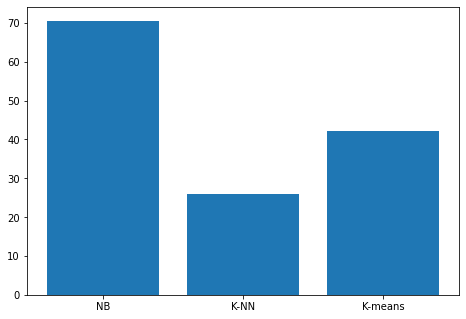

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['NB', 'K-NN', 'K-means']
students = [acc_NB,acc_knn,acc_kmeans]
ax.bar(langs,students)
plt.show()

In [94]:
acc_NB=test_model(test_x,test_y,0)
print("Accuracy using dev dataset and aplha 0 ",acc_NB)

Accuracy using dev dataset and aplha 0  6.170037144036319


In [95]:
acc_NB=test_model(test_x,test_y,1)
print("Accuracy using dev dataset and aplha 1 ",acc_NB)

Accuracy using dev dataset and aplha 1  72.41023524556334


In [97]:
acc_NB=test_model(test_x,test_y,1/10)
print("Accuracy using dev dataset and aplha 1 ",acc_NB)

Accuracy using dev dataset and aplha 1  72.34832851836566


In [98]:
data="Congrats!! You are winner of 1000 amount."
data=re.sub(r'[^a-z A-Z 0-9]', '', data)
data=data.lower()
w_t=word_tokenize(data)
fs = [w for w in w_t if not w in s_w]
data=" ".join(fs)
print(data)

congrats winner 1000 amount


In [99]:
w_t=word_tokenize(data)
spam_prob=1
ham_prob=1
final_lable=-20#random value initialized
for w in w_t:
    if(w not in spam_wd_set):
        spam_prob=spam_prob*0/(spam_count+2*0)
    else:
        spam_prob=spam_prob*((spam_wd_set[w]+0)/spam_count+2*0)
        print("spam_prob ",w,spam_prob)
    if(w not in ham_wd_set):
         ham_prob=ham_prob*0/(ham_count+2*0)
    else:
        ham_prob=ham_prob*((ham_wd_set[w]+0)/ham_count+2*0)
        print("hamm ",w,ham_wd_set[w]/ham_count)
    
spam_prob=spam_prob*spam_class_prob
ham_prob=ham_prob*ham_class_prob
print("Final Spam prob ",spam_prob)
print("Final ham prob ",ham_prob)
if(spam_prob>=ham_prob):
    final_lable=1
else:
    final_lable=0

spam_prob  congrats 0.0029533372711163615
hamm  congrats 0.0008073921234412846
spam_prob  winner 6.105540725875526e-05
hamm  winner 0.008073921234412846
spam_prob  1000 3.660439360167548e-06
hamm  1000 0.023414371579797255
spam_prob  amount 2.1729129101998736e-07
hamm  amount 0.0555306360455728
Final Spam prob  5.0626044959311724e-08
Final ham prob  6.50110077670098e-09


In [100]:
final_lable

1

In [101]:
#to improve performance use email column of data
data1 = pd.read_excel('spamham/SPAM text message 20170820 - Data1.xlsx')

new_data=[]

for key,row1 in data1.iterrows():
    count=0
    val=0
    reply=0
    stringmsg=re.sub(r'[^a-z A-Z 0-9]', '', str(row1['Message']))
    stringmsg=stringmsg.lower()
    stringemail=row1['Email']
    if(row1['Category']=='spam'):
        count+=1
        val=1
        if(count<4):
            reply=1
        else:
            reply=0
    else:
        reply=1
    obj={'strmsg':stringmsg,'stremail':stringemail,'category':val,'reply':reply}
    new_data.append(obj)

s_w = set(stopwords.words('english'))
i=0
for obj in new_data:
    w_t=word_tokenize(obj['strmsg'])
    fs = [w for w in w_t if not w in s_w]
    strobj1=" ".join(fs)
    obj['strmsg']=strobj1
    i=i+1


In [102]:


#all words in spam without repeatation
spam_wd_set1={}
ham_wd_set1={}
spam_domain_set1={}
ham_domain_set1={}
spam_count1=0
ham_count1=0

In [103]:
# train test dev ratio 80 20
full_len=len(new_data)
len_train=int(len(new_data)*0.8)

train_data_new=new_data[0:len_train]
test_data_new=new_data[len_train:full_len]

In [104]:
def nb_classifier_improved(data):
    global spam_wd_set1,ham_wd_set1,spam_domain_set1,ham_domain_set1
    for strobj in data:
        if(strobj['stremail']!=None and strobj['category']==1):
            email=strobj['stremail']
            if(type(email)==str):
                dom=email[email.index('@') + 1 :email.index('.')]
                if(dom not in spam_domain_set1):
                    spam_domain_set1[dom]=1
                else:
                    countdom=spam_domain_set1[dom]
                    spam_domain_set1[dom]=countdom+1
        elif(strobj['stremail']!=None and strobj['category']==0):
            email=strobj['stremail']
            if(type(email)==str):        
                dom=email[email.index('@') + 1 :email.index('.')]
                if(dom not in ham_domain_set1):
                    ham_domain_set1[dom]=1
                else:
                    countdom=ham_domain_set1[dom]
                    ham_domain_set1[dom]=countdom+1
            
        w_t=word_tokenize(strobj['strmsg'])
        w_t_set=set(w_t)
        for w in w_t:
            if strobj['category']==1:
                if w not in spam_wd_set1:
                    spam_wd_set1[w]=1
                else:
                    count=spam_wd_set1[w]
                    spam_wd_set1[w]=count+1
            else:
                if w not in ham_wd_set1:
                    ham_wd_set1[w]=1
                else:
                    count=ham_wd_set1[w]
                    ham_wd_set1[w]=count+1                           


In [105]:
new_data[0]

{'strmsg': 'go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'stremail': 'abc@test.com',
 'category': 0,
 'reply': 1}

In [106]:
nb_classifier_improved(train_data_new)

In [107]:
for d in train_data_new:
    if(d['category']==1):
        spam_count1+=1
    else:
        ham_count1+=1
        
spam_class_prob1=spam_count1/len(train_data_new)
ham_class_prob1=ham_count1/len(train_data_new)

In [108]:
def test_model1(data_new,alpha):
    
    i=0
    correct_count=0
    accuracy=0
    for data in data_new:
        dom_prob_spam=1
        dom_prob_ham=1
        if(data['stremail']!=None and data['category']==1):
            email=data['stremail']
            if(type(email)==str):
                dom=email[email.index('@') + 1 :email.index('.')]
                if(dom in spam_domain_set1):
                    count=spam_domain_set1[dom]
                    dom_prob_spam=count/spam_count1
                if(dom in ham_domain_set1):
                    count=ham_domain_set1[dom]
                    dom_prob_ham=count/ham_count1                
        w_t=word_tokenize(data['strmsg'])
        spam_prob=1
        ham_prob=1
        final_lable=-20#random value initialized
        for w in w_t:
            if(w not in spam_wd_set1):
                spam_prob=spam_prob*(alpha/(spam_count1+2*alpha))*dom_prob_spam
                #print("spam ",spam_prob)
            else:
                spam_prob=spam_prob*((spam_wd_set1[w]+alpha)/(spam_count1+2*alpha))*dom_prob_spam
            if(w not in ham_wd_set1):
                ham_prob=ham_prob*(alpha/(ham_count1+2*alpha))*dom_prob_ham
                #print("ham ",ham_prob)
            else:
                ham_prob=ham_prob*((ham_wd_set1[w]+alpha)/(ham_count1+2*alpha))*dom_prob_ham
       
        
        spam_prob=spam_prob*spam_class_prob1
        ham_prob=ham_prob*ham_class_prob1
        if(spam_prob>=ham_prob):
            final_lable=1
        else:
            final_lable=0
        if(data['category']==final_lable):
            correct_count=correct_count+1
        i=i+1

    accuracy=(correct_count/len(data_new))*100
    return accuracy


In [109]:
test_model1(test_data_new,0)

60.17937219730942

In [110]:
def test_model2(data_new,alpha):
    
    i=0
    correct_count=0
    accuracy=0
    for data in data_new:
        dom_prob_spam=1
        dom_prob_ham=1
        if(data['stremail']!=None and data['category']==1):
            email=data['stremail']
            if(type(email)==str):
                dom=email[email.index('@') + 1 :email.index('.')]
                if(dom in spam_domain_set1):
                    count=spam_domain_set1[dom]
                    dom_prob_spam=count/spam_count1
                if(dom in ham_domain_set1):
                    count=ham_domain_set1[dom]
                    dom_prob_ham=count/ham_count1                
        w_t=word_tokenize(data['strmsg'])
        spam_prob=1
        ham_prob=1
        final_lable=-20#random value initialized
        for w in w_t:
            if(w not in spam_wd_set1):
                spam_prob=spam_prob*(alpha/(spam_count1+2*alpha))*dom_prob_spam
                #print("spam ",spam_prob)
            else:
                spam_prob=spam_prob*((spam_wd_set1[w]+alpha)/(spam_count1+2*alpha))*dom_prob_spam
            if(w not in ham_wd_set1):
                ham_prob=ham_prob*(alpha/(ham_count1+2*alpha))*dom_prob_ham
                #print("ham ",ham_prob)
            else:
                ham_prob=ham_prob*((ham_wd_set1[w]+alpha)/(ham_count1+2*alpha))*dom_prob_ham
       
        
        spam_prob=spam_prob*spam_class_prob1
        ham_prob=ham_prob*ham_class_prob1
        if(spam_prob>ham_prob and data['reply']==0):
            final_lable=1
        else:
            final_lable=0
        if(data['category']==final_lable):
            correct_count=correct_count+1
        i=i+1

    accuracy=(correct_count/len(data_new))*100
    return accuracy


In [111]:
test_model1(test_data_new,0)

60.17937219730942